# **Santander Customer Satisfaction**

*Matheus C. Andrade*

*August 2, 2021*

## **1. Overview**

---
From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking [Kagglers](https://www.kaggle.com/c/santander-customer-satisfaction/overview) to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this project, we'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

**Goal:** use the <u>Python language</u> to create a machine learning model that can predict whether a customer is satisfied or dissatisfied with their banking experience.


**Features informations:** <br>
&emsp;• The dataset has numeric and anonymous variables. <br>
&emsp;• The target variable is TARGET column: <br>&emsp;&emsp;- 0 stands for Satisfied Customers;<br>&emsp;&emsp;- 1 stands for Dissatisfied Customers.

---

## **2. Data Collection**

### **2.1 Importing libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### **2.1 Data loading**

In [2]:
# Loading train dataset
df_train = pd.read_csv("data/train.csv", header = 0)

In [3]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
# Loading test dataset
df_test = pd.read_csv("data/test.csv", header = 0)

In [5]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73



---

## **3. Exploratory Data Analysis & Data preprocessing (Data Wrangling)**


### **3.1 Train dataset**

In [6]:
# Drop first column, ID column
df_train = df_train.iloc[: , 1:]

In [7]:
df_train.shape

(76020, 370)

In [8]:
# Drop first column of dataframe, ID column
df_train = df_train.iloc[: , 1:]

In [9]:
# Counting duplicate rows
df_train.duplicated().sum()

4849

In [10]:
# Removing duplicate rows
df_train = df_train.drop_duplicates()

In [11]:
df_train.shape

(71171, 369)

In [12]:
# Detecting missing values
df_train.isna().sum().sum() # df_train.isnull().values.any()

0

No missing values

In [13]:
# Data type check
df_train.dtypes.value_counts()

int64      258
float64    111
dtype: int64

#### **3.1.1 Target feature**

In [14]:
df_train['TARGET'].value_counts()

0    68357
1     2814
Name: TARGET, dtype: int64

,TARGET,Frequency (%)
Satisfied Customers,68357,96.046142
Dissatisfied Customers,2814,3.953858


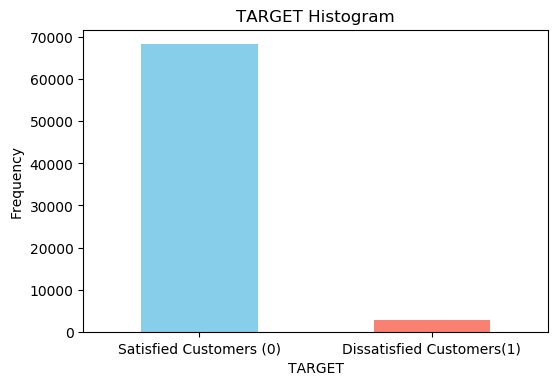

In [51]:
plt.rcParams['figure.dpi'] = 100
# Target variable distribution
pd.value_counts(df_train['TARGET']).plot.bar(color=['skyblue', 'salmon'])
plt.title('TARGET Histogram')
plt.xlabel('TARGET')
plt.ylabel('Frequency')
plt.xticks([0, 1],['Satisfied Customers (0)', 'Dissatisfied Customers(1)'], rotation=0)
plt.template = 'plotly_white'

# # Target variable frequency
df_targetPercent = pd.DataFrame(df_train['TARGET'].value_counts())
df_targetPercent['Frequency (%)'] = 100*df_targetPercent['TARGET']/df_train.shape[0]
df_targetPercent = df_targetPercent.rename(index={0: 'Satisfied Customers', 1: 'Dissatisfied Customers'})
df_targetPercent

There is an unequal distribution of classes in the training dataset, this is a imbalanced dataset. Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.

### **3.2 Feature selection**

#### **3.2.1 Removing features with low variance**

It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [16]:
# function for removing features with 0 variance 
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data):
    selector = VarianceThreshold() # removing all features with null variance/zero variance
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [17]:
df_train = variance_threshold_selector(df_train)

In [18]:
df_train.shape # 34 features were found to have zero variance and these were all removed.

(71171, 335)

In [19]:
df_train

,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,37,0.0,195.00,195.00,0.0,0.0,0.0,0.0,0.0,195.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76014,39,0.0,375.99,405.33,0.0,0.0,0.0,0.0,0.0,375.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90214.170000,0
76015,48,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0


#### **3.2.2 Tree-based feature selection**

Tree-based estimators can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features.

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

# Separating the dataset into input (X) and output (Y)
X = df_train.iloc[:, :-1] # Drop last column of a dataframe
y = df_train.TARGET # get last column of a dataframe #df.iloc[:,-1:] 

# Feature Selection Model Creation
featureSelection_model = ExtraTreesClassifier(random_state=123)
featureSelection_model.fit(X, y)

# Convert the result to dataframe
df_featuresSelected = pd.DataFrame(df_train.columns,columns=['Columns'])
df_featuresSelected['Score'] = pd.DataFrame(featureSelection_model.feature_importances_.astype(float))

# Sort by score
result = df_featuresSelected.sort_values('Score',ascending=False)

In [21]:
result[result['Score'] <= 0].shape
# There are 26 columns that have significance less than or equal to zero for the dataset. So we'll remove them too.

(26, 2)

In [22]:
result[result['Score'] > 0].sum()
# As we can confirmate, the sum of columns that have worthiness bigger than zero is equal to 1.

Columns    var38var15saldo_medio_var5_hace3saldo_medio_va...
Score                                                      1
dtype: object

In [23]:
# Selection of pertinent columns
cols_of_interest = result[result['Score'] > 0]['Columns']

# Adding target column label to the columns of interest
cols_of_interest = cols_of_interest.append(pd.Series(['TARGET']))

In [24]:
# Getting only columns of interest in training df
df_trainFS = df_train[cols_of_interest]

In [25]:
df_trainFS

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,num_aport_var33_ult1,delta_imp_trasp_var33_out_1y3,delta_imp_amort_var18_1y3,saldo_var6,num_op_var40_hace3,delta_num_trasp_var33_out_1y3,saldo_medio_var13_medio_ult1,ind_var18,delta_imp_amort_var34_1y3,TARGET
0,39205.170000,23,0.00,0.00,0,0,0,0,0.00,0,...,0,0,0,0.0,0,0,0,0,0,0
1,49278.030000,34,88.89,0.00,0,0,0,0,0.00,0,...,0,0,0,0.0,0,0,0,0,0,0
2,67333.770000,23,0.18,2.07,0,0,0,0,3.00,0,...,0,0,0,0.0,0,0,0,0,0,0
3,64007.970000,37,0.00,138.84,48,3,27,3,186.09,18,...,0,0,0,0.0,0,0,0,0,0,0
4,117310.979016,39,0.30,13501.47,0,0,0,9,3.00,0,...,0,0,0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76014,90214.170000,39,169.35,1025.37,99,12,36,12,217.74,51,...,0,0,0,0.0,0,0,0,0,0,0
76015,60926.490000,48,0.00,0.00,0,0,0,0,0.00,0,...,0,0,0,0.0,0,0,0,0,0,0
76016,118634.520000,39,0.00,0.00,48,3,36,24,130.65,9,...,0,0,0,0.0,0,0,0,0,0,0
76017,74028.150000,23,0.00,3.00,0,0,0,0,3.00,0,...,0,0,0,0.0,0,0,0,0,0,0


In [26]:
# Generate descriptive statistics. 
df_trainFS.describe()


,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,num_aport_var33_ult1,delta_imp_trasp_var33_out_1y3,delta_imp_amort_var18_1y3,saldo_var6,num_op_var40_hace3,delta_num_trasp_var33_out_1y3,saldo_medio_var13_medio_ult1,ind_var18,delta_imp_amort_var34_1y3,TARGET
count,7.117100e+04,71171.000000,7.117100e+04,71171.000000,71171.000000,71171.000000,71171.000000,71171.000000,71171.000000,71171.000000,...,71171.000000,7.117100e+04,7.117100e+04,71171.000000,71171.000000,7.117100e+04,71171.000000,71171.000000,7.117100e+04,71171.000000
mean,1.171340e+05,33.559455,9.519084e+02,1119.886224,14.568532,4.151846,5.756994,3.248612,1686.190237,4.659693,...,0.000337,1.405067e+05,2.810133e+05,0.442714,0.001096,1.405067e+05,0.547976,0.000028,2.810133e+05,0.039539
std,1.882831e+05,13.106936,1.021710e+04,8459.678203,34.226905,10.716077,14.911929,6.361837,12548.327742,14.842786,...,0.035559,3.748422e+07,5.301032e+07,85.880885,0.186818,3.748422e+07,117.403567,0.005301,5.301032e+07,0.194874
min,5.163750e+03,5.000000,-8.040000e+00,-476.070000,0.000000,0.000000,0.000000,0.000000,-128.370000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,6.585643e+04,23.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
50%,1.001368e+05,28.000000,1.050000e+00,2.790000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
75%,1.228413e+05,40.000000,1.599000e+01,89.595000,15.000000,3.000000,6.000000,3.000000,90.000000,3.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
max,2.203474e+07,105.000000,1.542339e+06,544365.570000,801.000000,339.000000,342.000000,234.000000,812137.260000,510.000000,...,6.000000,1.000000e+10,1.000000e+10,19531.800000,48.000000,1.000000e+10,30000.000000,1.000000,1.000000e+10,1.000000


Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [27]:
# Detecting missing values in the new dataset
df_trainFS.isna().sum().sum() # df_train.isnull().values.any()

0

### **3.3 Correlation Analysis**

In [28]:
# Since there are many variables, let's get justcolumns in which its scores sums represents about 82% of dataset.
result[result['Score'] > 0.008].sum()

Columns    var38var15saldo_medio_var5_hace3saldo_medio_va...
Score                                               0.819848
dtype: object

In [29]:
# so, instead of analysing 309 columns, we will analyse just the more important columns. They are 21 columns.
result[result['Score'] > 0.008].shape

(21, 2)

In [30]:
# the 21 of most important columns and their respective score to the dataset
result[result['Score'] > 0.008]

,Columns,Score
333,var38,0.409930
0,var15,0.153292
295,saldo_medio_var5_hace3,0.025690
297,saldo_medio_var5_ult3,0.024887
293,num_var45_ult3,0.020091
291,num_var45_hace3,0.018750
290,num_var45_hace2,0.016215
248,num_var22_ult3,0.013850
294,saldo_medio_var5_hace2,0.013380
292,num_var45_ult1,0.012654


In [31]:
# Getting 21 labels of most important columns
cols_corr = result[0:21]['Columns']

# Getting target label
cols_corr = cols_corr.append(pd.Series(['TARGET']))

# Getting only pertinent columns to the correlation analysis in training df
df_corr = df_train[cols_corr]

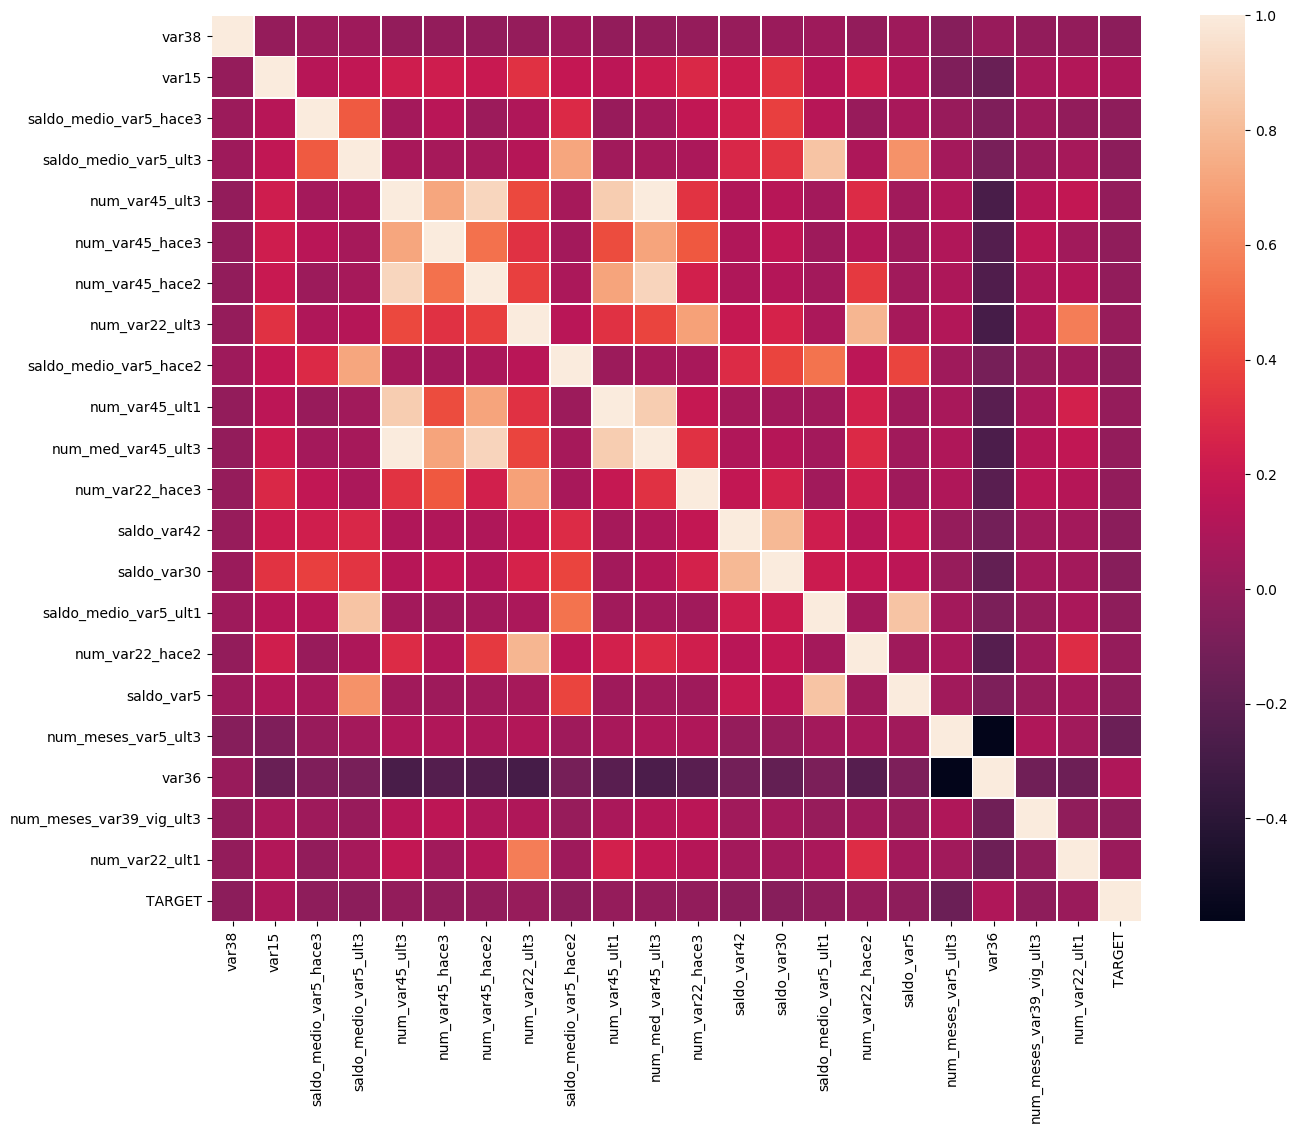

In [52]:
# Correlation

import seaborn as sns

# Applying the correlation: compute pairwise correlation of columns, excluding NA/null values.
df_corr_ = df_corr.corr()

# Correlation plotting with a heatmap
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df_corr_,linewidths=.5, ax=ax);

### **3.4 Most important features analysis**

In [33]:
result[result['Score'] > 0.02]

,Columns,Score
333,var38,0.409930
0,var15,0.153292
295,saldo_medio_var5_hace3,0.025690
297,saldo_medio_var5_ult3,0.024887
293,num_var45_ult3,0.020091


It will be analyzed just two variables: var38 and var15, since their scores sums represents about 55% of dataset, and the others represent no more than 3%.

In [34]:
#df_analysis = df_trainFS

#### **3.4.1 var38**

In [35]:
# 'var38' descriptive statistics.
df_trainFS.var38.describe()

count    7.117100e+04
mean     1.171340e+05
std      1.882831e+05
min      5.163750e+03
25%      6.585643e+04
50%      1.001368e+05
75%      1.228413e+05
max      2.203474e+07
Name: var38, dtype: float64

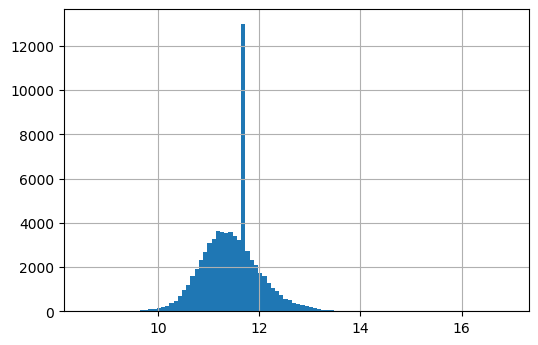

In [36]:
# 'var38' histogram
df_trainFS.var38.map(np.log).hist(bins=100);

There is a value with many more occurrences than the others

In [37]:
# Viewing the most common variable value

df_trainFS.var38.value_counts()

117310.979016    10069
451931.220000       16
463625.160000       12
104563.800000       11
288997.440000       10
                 ...  
49273.950000         1
261810.900000        1
49898.280000         1
39156.810000         1
159395.520000        1
Name: var38, Length: 57736, dtype: int64

The value 117310.979016 appears 10069 times (much higher than the other values).

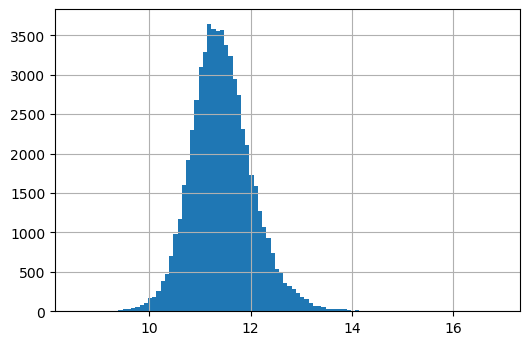

In [38]:
# Viewing var38 histogram without the most common variable value
df_trainFS.loc[~np.isclose(df_trainFS.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100);

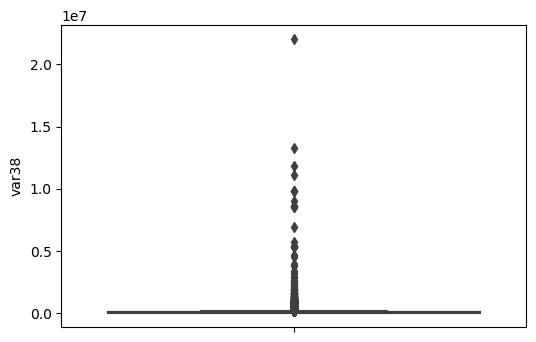

In [39]:
# var38 Boxplot
sns.boxplot(x=df_trainFS["var38"], orient='v') # df_trainFS.boxplot(column=['var38'])

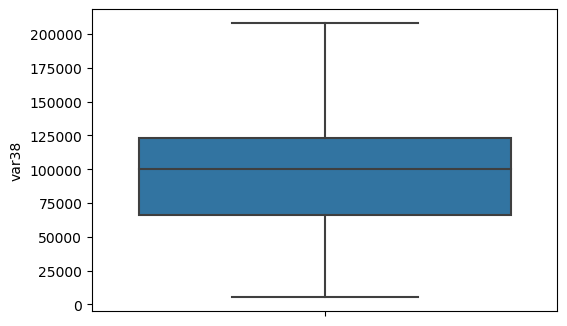

In [40]:
# var38 Boxplot without outliers
sns.boxplot(x=df_trainFS["var38"], showfliers=False, orient='v') # df_trainFS.boxplot(column=['var38'], showfliers=False)

#### **3.4.2 var15**

In [41]:
# 'var15' descriptive statistics.
df_trainFS.var15.describe()

count    71171.000000
mean        33.559455
std         13.106936
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

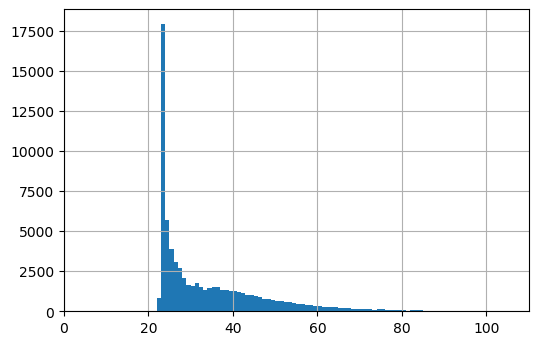

In [42]:
# 'var15' histogram
df_trainFS.var15.hist(bins=100);

According to variables information at Kaggle's forum, this variable seems to be the age of the customer. Notice that there is a value with many more occurrences than the others.

In [43]:
# Viewing the most common values
var15_rel = df_trainFS.var15.value_counts(normalize=True).head(10)
var15_abs = df_trainFS.var15.value_counts().head(10)
var15_abs_rel = pd.DataFrame({'Age':var15_abs.index, 
                              'var15_abs': var15_abs,
                              'var15_rel':var15_rel,}).reset_index(drop=True)
#pd.DataFrame(dict(Age=var15_abs.index, var15_abs = var15_abs, var15_rel = var15_rel)).reset_index(drop=True)
var15_abs_rel

,Age,var15_abs,var15_rel
0,23,17936,0.252013
1,24,5717,0.080328
2,25,3901,0.054812
3,26,3083,0.043318
4,27,2684,0.037712
5,28,2063,0.028987
6,31,1739,0.024434
7,29,1654,0.023240
8,30,1581,0.022214
9,32,1522,0.021385


In [44]:
var15_abs_rel['var15_rel'].sum()

0.5884419215691785

The most common age is 23, which represents a quarter of all customers. It should also be noted that most customers are between 23 and 32 years old, which represents around 58% of total customers.

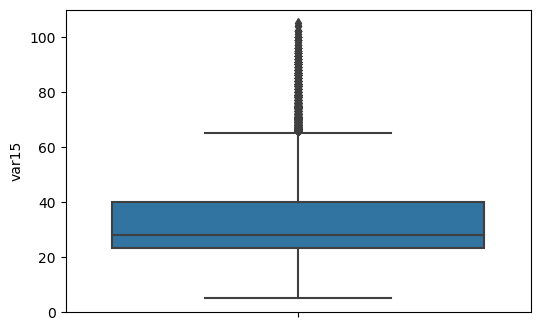

In [45]:
# var15 Boxplot
sns.boxplot(x=df_trainFS["var15"], orient='v') # df_trainFS.boxplot(column=['var38'])

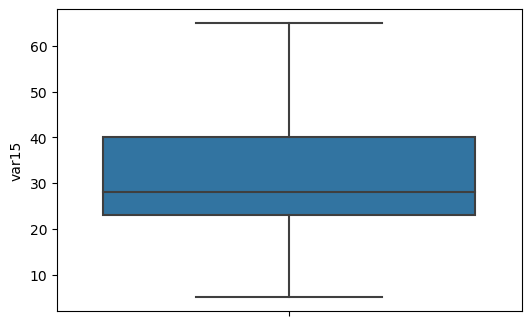

In [46]:
# var15 Boxplot without outliers
sns.boxplot(x=df_trainFS["var15"], showfliers=False, orient='v') # df_trainFS.boxplot(column=['var38'], showfliers=False)

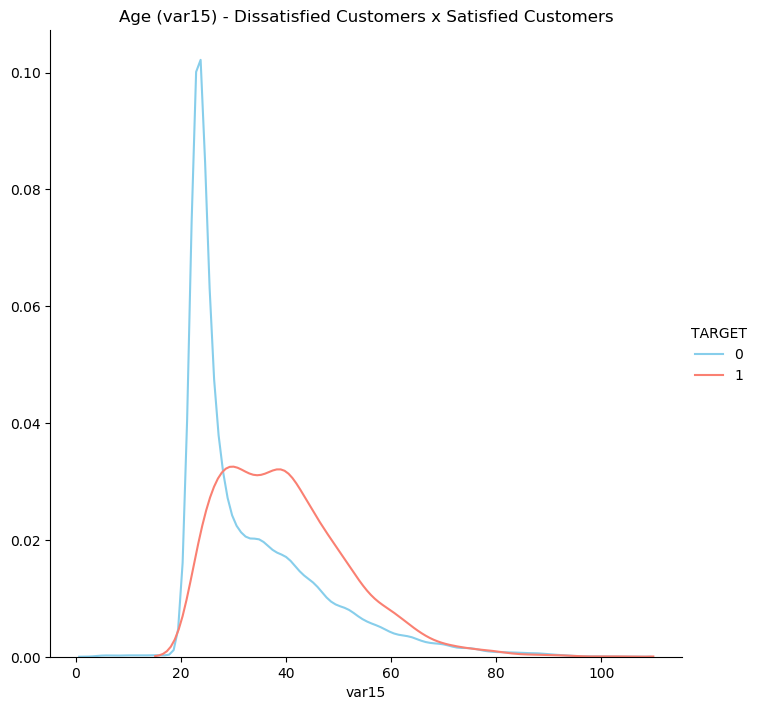

In [47]:
# Kernel distribution estimation plot
sns.FacetGrid(df_trainFS, hue="TARGET", height=7, hue_kws={'color': ['skyblue', 'salmon']}) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Age (var15) - Dissatisfied Customers x Satisfied Customers');

The most dissatisfied customers are the oldest.

## Data Splitting



In [53]:
from sklearn.model_selection import train_test_split

# Split dataset into input and output variables
X = df_trainFS.iloc[:,:-1]
y = df_trainFS.TARGET

# Sizes of train and test dataset 
test_size = 0.3

# Setting a seed to allow the same experiment result to be reproducible
seed = 123

# Split dataset into random train and test subsets
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = test_size, random_state = seed)

# scale_pos_weight = count(negative examples)/count(Positive examples) weight = 68357/2814
# scale_pos_weight = sqrt(count(negative examples)/count(Positive examples)) 

## **4. Data Modelling**


In [62]:
# libraries
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


In [55]:
# Defines the machine learning hyperparameter that will be automatically tuned
paramsGrid = {
    'learning_rate'    : [0.05, 0.10], 
    'max_depth'        : [3, 4],
    'max_delta_step'   : [1, 2],
    #'gamma'            : [0.0, 0.1]
    #'min_child_weight' : [1, 3],
}

In [56]:
# Defines the machine learning hyperparameter that will be automatically tuned
paramsGrid = {
    'learning_rate'    : [0.05], 
    'max_depth'        : [3],
    'max_delta_step'   : [1],
    #'gamma'            : [0.0, 0.1]
    #'min_child_weight' : [1, 3],
}

In [57]:
# creating the obejct for exhaustive search over specified parameter values for an estimator
clf = GridSearchCV(estimator=XGBClassifier(random_state=seed, eval_metric='logloss'), 
                                     param_grid=paramsGrid,
                                     cv=5, 
                                     n_jobs=-1, # using all processors
                                     scoring='roc_auc')

In [58]:
# Run fit with all sets of parameters.
clf.fit(X_treino, y_treino)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=123,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=N

In [59]:
# Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified)
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=1,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [60]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
print('Train AUC:', roc_auc_score(y_treino, clf.predict_proba(X_treino)[:, 1]))
print('Test AUC:', roc_auc_score(y_teste, clf.predict_proba(X_teste)[:, 1]))

Train AUC: 0.8406291428008725
Test AUC: 0.8324038819459891


# Prediction

In [64]:
df_test

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [66]:
testID = df_test.ID

In [68]:
len(cols_of_interest)

309

In [69]:
cols_of_interest_test = cols_of_interest.iloc[:-1]

In [71]:
new_test = df_test[cols_of_interest_test]

In [72]:
new_test

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,ind_var13_medio,num_aport_var33_ult1,delta_imp_trasp_var33_out_1y3,delta_imp_amort_var18_1y3,saldo_var6,num_op_var40_hace3,delta_num_trasp_var33_out_1y3,saldo_medio_var13_medio_ult1,ind_var18,delta_imp_amort_var34_1y3
0,40532.100000,32,2.43,4.80,0,0,0,3,6.0,0,...,0,0,0,0,0.0,0,0,0.0,0,0
1,45486.720000,35,2.55,2.85,6,6,0,3,3.0,0,...,0,0,0,0,0.0,0,0,0.0,0,0
2,46993.950000,23,57.00,66.15,9,6,3,0,90.0,0,...,0,0,0,0,0.0,0,0,0.0,0,0
3,187898.610000,24,0.00,0.00,0,0,0,0,0.0,0,...,0,0,0,0,0.0,0,0,0.0,0,0
4,73649.730000,23,3.87,21.30,0,0,0,0,30.0,0,...,0,0,0,0,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,40243.200000,23,0.00,0.00,6,6,0,0,0.0,0,...,0,0,0,0,0.0,0,0,0.0,0,0
75814,146961.300000,26,1.23,2.40,0,0,0,0,3.0,0,...,0,0,0,0,0.0,0,0,0.0,0,0
75815,167299.770000,24,29.04,69.69,0,0,0,0,90.0,0,...,0,0,0,0,0.0,0,0,0.0,0,0
75816,117310.979016,40,1.89,2.64,0,0,0,0,3.0,0,...,0,0,0,0,0.0,0,0,0.0,0,0


In [73]:
X_train = X
y_train = y
X_test = new_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(71171, 308)
(71171,)
(75818, 308)


In [77]:
preds = clf.predict_proba(X_test)[:, 1]
preds

array([0.05813691, 0.06246929, 0.00842656, ..., 0.01135778, 0.06905743,
       0.00842656], dtype=float32)

# Submission

In [79]:
kaggleSubmission = pd.DataFrame({
    'ID'    : testID,
    'TARGET': preds
})

In [ ]:
kaggleSubmission.to_csv(r'XGB_Grid.csv', index = False, header=True)
